In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import feature_extraction as fe
import imp
imp.reload(fe)

C:\Users\USER\AppData\Local\Temp\ipykernel_7560\123357903.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


<module 'feature_extraction' from 'C:\\Users\\USER\\Documents\\IF5171\\stock-pred-api\\modeling\\feature_engineering\\feature_extraction.py'>

In [3]:
df = yf.download('ISAT.JK', start='2012-09-18', end='2022-09-18')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-09-18,6050.0,6200.0,5900.0,6050.0,5033.156738,3809500
2012-09-19,6050.0,6100.0,6000.0,6050.0,5033.156738,2498000
2012-09-20,5700.0,6000.0,5650.0,5700.0,4741.982422,6142500
2012-09-21,5350.0,5750.0,5250.0,5350.0,4450.807617,12418000
2012-09-24,5300.0,5500.0,5150.0,5300.0,4409.210938,5709500


In [4]:
df.index = pd.to_datetime(df.index)

## Features Extraction

In [5]:
df2 = fe.generate_TAs_features(df)
df2.head()

,Open,High,Low,Close,Adj Close,Volume,7 DAYS MA,RSI 7,MFI 7,7 DAYS STD DEV,14 DAYS MA,RSI 14,MFI 14,21 DAYS MA,RSI 21,MFI 21
Date,,,,,,,,,,,,,,,,
2012-10-18,6050.0,6200.0,6000.0,6050.0,5033.156738,1800000,5985.714286,68.097080,62.454151,85.216810,5714.285714,53.242462,76.318947,5645.238095,51.063830,54.506280
2012-10-19,6050.0,6150.0,6000.0,6050.0,5033.156738,2150000,6000.000000,63.162804,59.242012,86.602540,5760.714286,51.450759,72.942854,5645.238095,49.947971,55.663988
2012-10-22,6200.0,6200.0,6000.0,6200.0,5157.945312,2443500,5992.857143,63.162804,37.363629,78.679579,5817.857143,51.450759,74.187897,5661.904762,49.947971,58.732466
2012-10-23,6150.0,6300.0,6100.0,6150.0,5116.348633,1864000,6021.428571,71.573518,52.690473,111.269728,5875.000000,56.539322,73.281637,5702.380952,53.321704,71.667041
2012-10-24,6100.0,6150.0,6000.0,6100.0,5074.752930,2370500,6050.000000,65.736656,62.492931,115.470054,5928.571429,54.489169,72.920363,5742.857143,52.092754,79.107109


In [6]:
df3 = fe.generate_date_related_features(df2)
df3.head()

,Open,High,Low,Close,Adj Close,Volume,7 DAYS MA,RSI 7,MFI 7,7 DAYS STD DEV,...,21 DAYS MA,RSI 21,MFI 21,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,,,,,,,,,,,,,
2012-10-18,6050.0,6200.0,6000.0,6050.0,5033.156738,1800000,5985.714286,68.097080,62.454151,85.216810,...,5645.238095,51.063830,54.506280,3,4,10,2012,292,18,42
2012-10-19,6050.0,6150.0,6000.0,6050.0,5033.156738,2150000,6000.000000,63.162804,59.242012,86.602540,...,5645.238095,49.947971,55.663988,4,4,10,2012,293,19,42
2012-10-22,6200.0,6200.0,6000.0,6200.0,5157.945312,2443500,5992.857143,63.162804,37.363629,78.679579,...,5661.904762,49.947971,58.732466,0,4,10,2012,296,22,43
2012-10-23,6150.0,6300.0,6100.0,6150.0,5116.348633,1864000,6021.428571,71.573518,52.690473,111.269728,...,5702.380952,53.321704,71.667041,1,4,10,2012,297,23,43
2012-10-24,6100.0,6150.0,6000.0,6100.0,5074.752930,2370500,6050.000000,65.736656,62.492931,115.470054,...,5742.857143,52.092754,79.107109,2,4,10,2012,298,24,43


In [7]:
df4 = df3.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
df4.head()

,Close,7 DAYS MA,RSI 7,MFI 7,7 DAYS STD DEV,14 DAYS MA,RSI 14,MFI 14,21 DAYS MA,RSI 21,MFI 21,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,,,,,,,,,,
2012-10-18,6050.0,5985.714286,68.097080,62.454151,85.216810,5714.285714,53.242462,76.318947,5645.238095,51.063830,54.506280,3,4,10,2012,292,18,42
2012-10-19,6050.0,6000.000000,63.162804,59.242012,86.602540,5760.714286,51.450759,72.942854,5645.238095,49.947971,55.663988,4,4,10,2012,293,19,42
2012-10-22,6200.0,5992.857143,63.162804,37.363629,78.679579,5817.857143,51.450759,74.187897,5661.904762,49.947971,58.732466,0,4,10,2012,296,22,43
2012-10-23,6150.0,6021.428571,71.573518,52.690473,111.269728,5875.000000,56.539322,73.281637,5702.380952,53.321704,71.667041,1,4,10,2012,297,23,43
2012-10-24,6100.0,6050.000000,65.736656,62.492931,115.470054,5928.571429,54.489169,72.920363,5742.857143,52.092754,79.107109,2,4,10,2012,298,24,43


In [8]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2458 entries, 2012-10-18 to 2022-09-16
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Close           2458 non-null   float64
 1   7 DAYS MA       2458 non-null   float64
 2   RSI 7           2458 non-null   float64
 3   MFI 7           2458 non-null   float64
 4   7 DAYS STD DEV  2458 non-null   float64
 5   14 DAYS MA      2458 non-null   float64
 6   RSI 14          2458 non-null   float64
 7   MFI 14          2458 non-null   float64
 8   21 DAYS MA      2458 non-null   float64
 9   RSI 21          2458 non-null   float64
 10  MFI 21          2458 non-null   float64
 11  dayofweek       2458 non-null   int64  
 12  quarter         2458 non-null   int64  
 13  month           2458 non-null   int64  
 14  year            2458 non-null   int64  
 15  dayofyear       2458 non-null   int64  
 16  dayofmonth      2458 non-null   int64  
 17  weekofyear     

In [9]:
df4['Close_'] = df4['Close']
df4 = df4.drop(['Close'], axis=1)
df4.head()

,7 DAYS MA,RSI 7,MFI 7,7 DAYS STD DEV,14 DAYS MA,RSI 14,MFI 14,21 DAYS MA,RSI 21,MFI 21,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Close_
Date,,,,,,,,,,,,,,,,,,
2012-10-18,5985.714286,68.097080,62.454151,85.216810,5714.285714,53.242462,76.318947,5645.238095,51.063830,54.506280,3,4,10,2012,292,18,42,6050.0
2012-10-19,6000.000000,63.162804,59.242012,86.602540,5760.714286,51.450759,72.942854,5645.238095,49.947971,55.663988,4,4,10,2012,293,19,42,6050.0
2012-10-22,5992.857143,63.162804,37.363629,78.679579,5817.857143,51.450759,74.187897,5661.904762,49.947971,58.732466,0,4,10,2012,296,22,43,6200.0
2012-10-23,6021.428571,71.573518,52.690473,111.269728,5875.000000,56.539322,73.281637,5702.380952,53.321704,71.667041,1,4,10,2012,297,23,43,6150.0
2012-10-24,6050.000000,65.736656,62.492931,115.470054,5928.571429,54.489169,72.920363,5742.857143,52.092754,79.107109,2,4,10,2012,298,24,43,6100.0


In [10]:
df4 = df4.rename(columns={'Close_': 'Close'})
df4.head()

,7 DAYS MA,RSI 7,MFI 7,7 DAYS STD DEV,14 DAYS MA,RSI 14,MFI 14,21 DAYS MA,RSI 21,MFI 21,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Close
Date,,,,,,,,,,,,,,,,,,
2012-10-18,5985.714286,68.097080,62.454151,85.216810,5714.285714,53.242462,76.318947,5645.238095,51.063830,54.506280,3,4,10,2012,292,18,42,6050.0
2012-10-19,6000.000000,63.162804,59.242012,86.602540,5760.714286,51.450759,72.942854,5645.238095,49.947971,55.663988,4,4,10,2012,293,19,42,6050.0
2012-10-22,5992.857143,63.162804,37.363629,78.679579,5817.857143,51.450759,74.187897,5661.904762,49.947971,58.732466,0,4,10,2012,296,22,43,6200.0
2012-10-23,6021.428571,71.573518,52.690473,111.269728,5875.000000,56.539322,73.281637,5702.380952,53.321704,71.667041,1,4,10,2012,297,23,43,6150.0
2012-10-24,6050.000000,65.736656,62.492931,115.470054,5928.571429,54.489169,72.920363,5742.857143,52.092754,79.107109,2,4,10,2012,298,24,43,6100.0


## Visualizations

C:\Users\USER\AppData\Local\Temp\ipykernel_7560\1562528874.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4['Close'])


<AxesSubplot: xlabel='Close', ylabel='Density'>

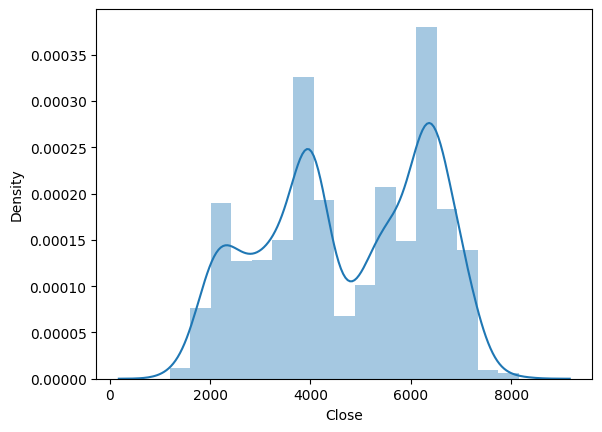

In [11]:
sns.distplot(df4['Close'])

## Standardize Data using StandardScaler

In [12]:
scaled_df = df4.copy()

In [13]:
from sklearn.preprocessing import StandardScaler

features_scaler = StandardScaler()
features = scaled_df.columns[:-1]
scaled_df[features] = features_scaler.fit_transform(scaled_df[features])

In [14]:
close_scaler = StandardScaler()
scaled_df['Close'] = close_scaler.fit_transform(np.array(scaled_df['Close']).reshape(-1,1))

In [15]:
scaled_df.head()

,7 DAYS MA,RSI 7,MFI 7,7 DAYS STD DEV,14 DAYS MA,RSI 14,MFI 14,21 DAYS MA,RSI 21,MFI 21,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Close
Date,,,,,,,,,,,,,,,,,,
2012-10-18,0.799925,1.073662,0.418671,-0.312226,0.635884,0.336862,1.067330,0.597595,0.195320,0.074433,0.716564,1.343175,1.017014,-1.847004,1.043362,0.261872,1.030744,0.834490
2012-10-19,0.808808,0.806503,0.304697,-0.297672,0.664911,0.206579,0.918767,0.597595,0.098108,0.133098,1.424203,1.343175,1.017014,-1.847004,1.052845,0.376468,1.030744,0.834490
2012-10-22,0.804367,0.806503,-0.471596,-0.380889,0.700635,0.206579,0.973554,0.608074,0.098108,0.288587,-1.406353,1.343175,1.017014,-1.847004,1.081294,0.720254,1.097111,0.927288
2012-10-23,0.822132,1.261889,0.072234,-0.038584,0.736360,0.576592,0.933675,0.633524,0.392022,0.944021,-0.698714,1.343175,1.017014,-1.847004,1.090777,0.834849,1.097111,0.896355
2012-10-24,0.839897,0.945861,0.420046,0.005533,0.769851,0.427516,0.917778,0.658973,0.284958,1.321032,0.008925,1.343175,1.017014,-1.847004,1.100260,0.949444,1.097111,0.865423


### Save the scalers

In [16]:
from joblib import dump, load

In [17]:
dump(features_scaler, 'isat_features_scaler.bin', compress=True)

['isat_features_scaler.bin']

In [18]:
dump(close_scaler, 'isat_close_scaler.bin', compress=True)

['isat_close_scaler.bin']

In [19]:
test_loaded_sc = load('isat_close_scaler.bin')

In [20]:
test_loaded_sc.inverse_transform(np.array(scaled_df['Close']).reshape(-1,1))[0]

array([6050.])

### Save the scaled data as csv

In [21]:
scaled_df.to_csv('../cleaned_data/ISAT.csv')

## EDA

In [22]:
import seaborn as sns
# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

In [23]:
# Correlation Coefficient
def plot_corr_coef(corr_data):
    mask = np.array(corr_data)
    mask[np.tril_indices_from(mask)] = False

    # create appropriate canvas
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)

    sns.heatmap(corr_data, mask=mask, vmax=.8, square=True, annot=True, ax = ax)

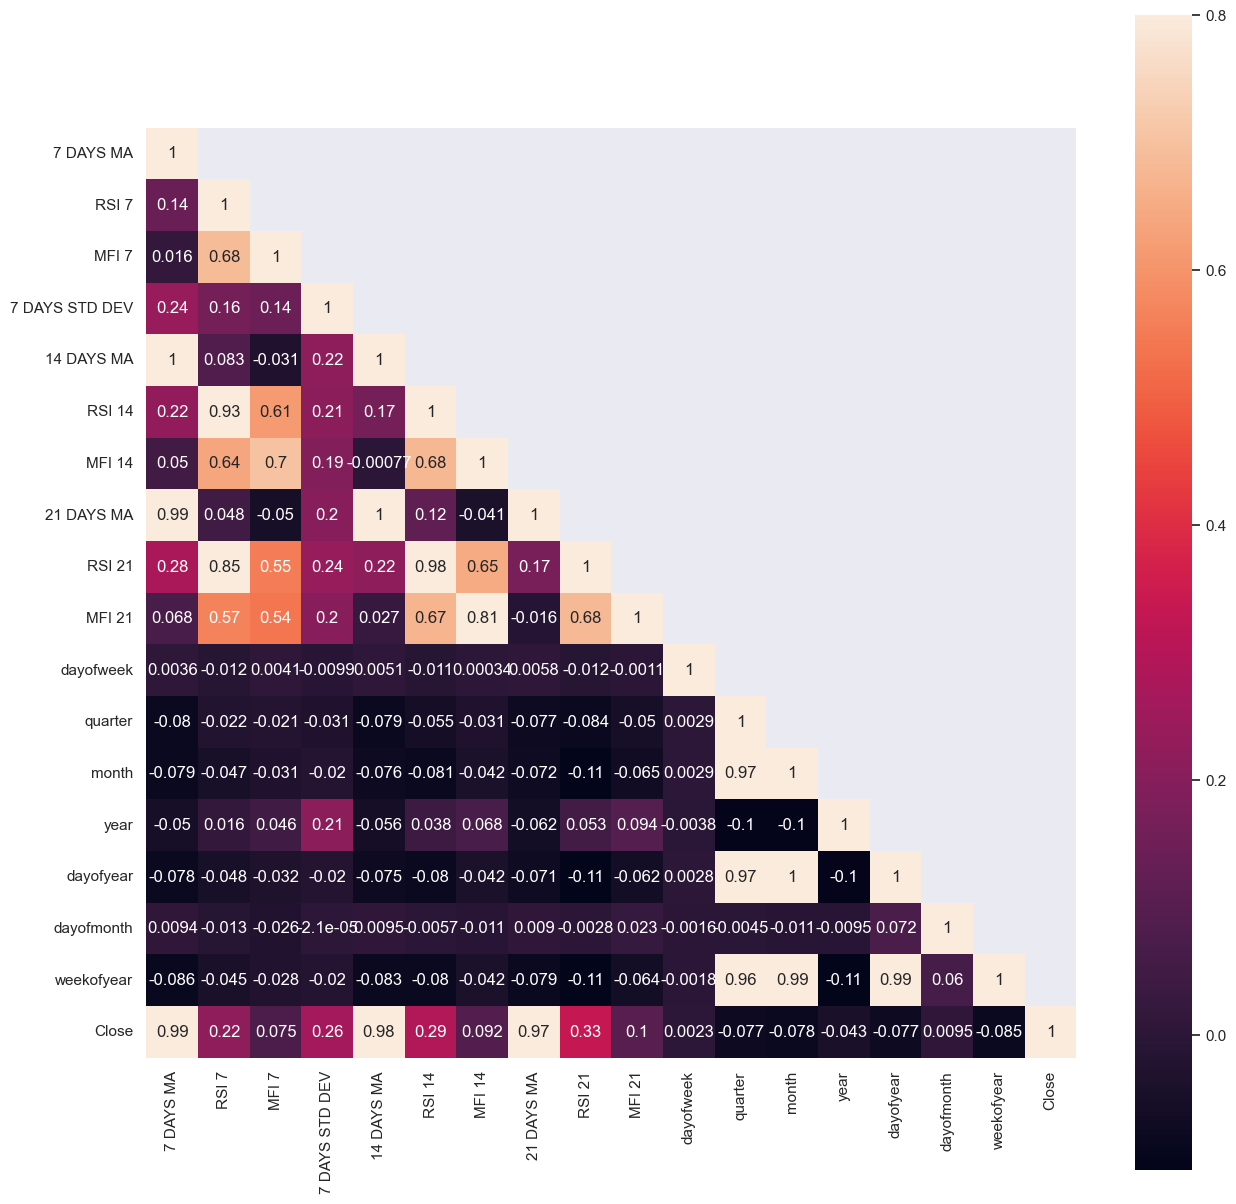

In [24]:
corr_data = scaled_df.corr()
plot_corr_coef(corr_data)

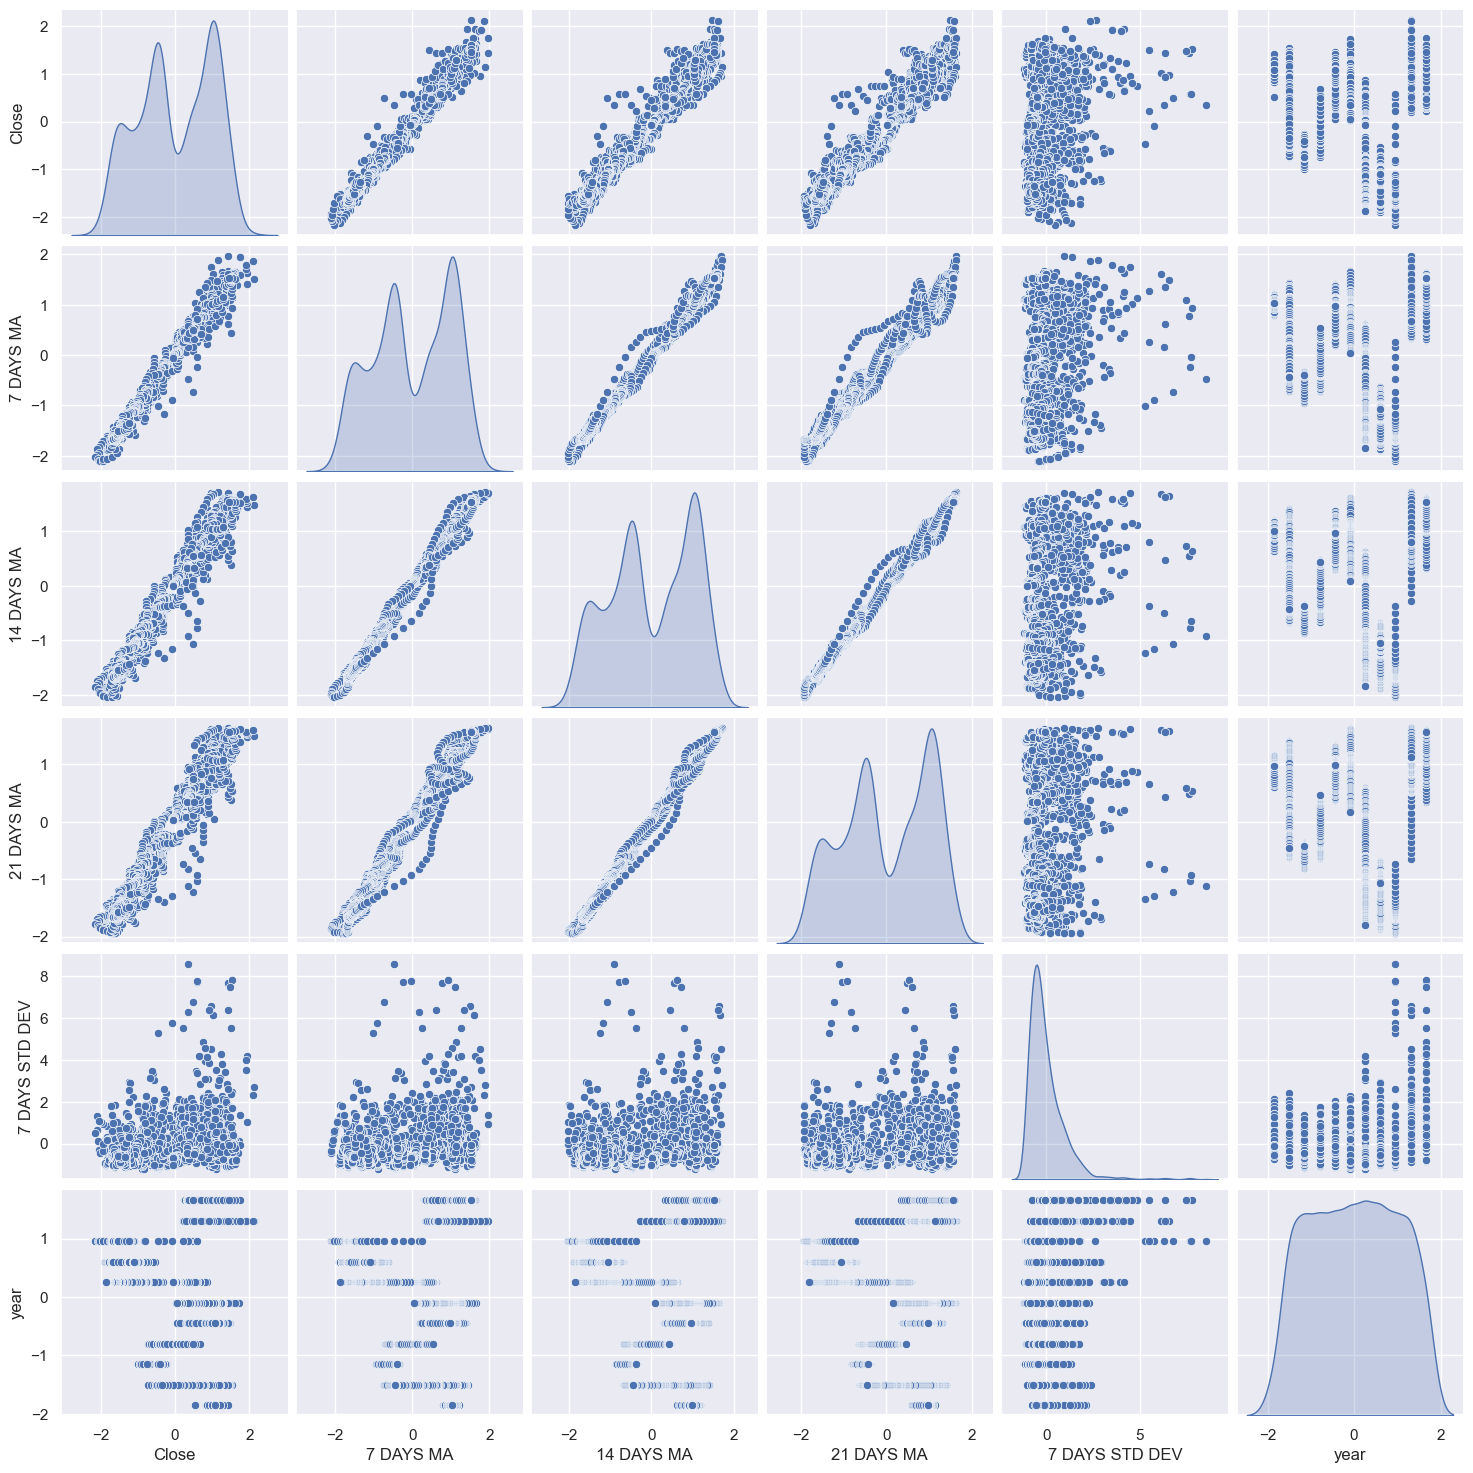

In [25]:
sns.pairplot(scaled_df[['Close', '7 DAYS MA', '14 DAYS MA', '21 DAYS MA', '7 DAYS STD DEV', 'year']], diag_kind='kde')